# Heatmap

In [1]:
import sys
sys.path.append('../../utils')

import utils

In [2]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
rng = np.random.default_rng(1234567890)
arr1 = rng.random(size=(10, 10))

## Matplotlib

[Documentation](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html)

### A simple heatmap using `imshow`

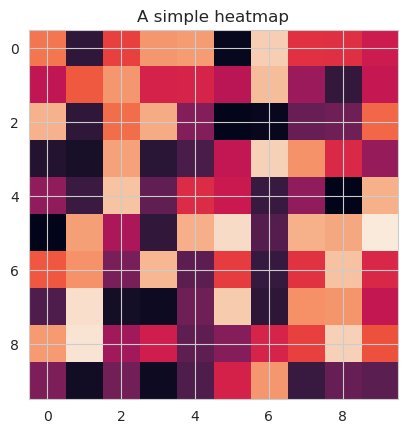

In [4]:
plt.imshow(arr1)
plt.title('A simple heatmap')

# Saving the image
utils.save_mpl(1)

plt.show()

### Creating colorbar

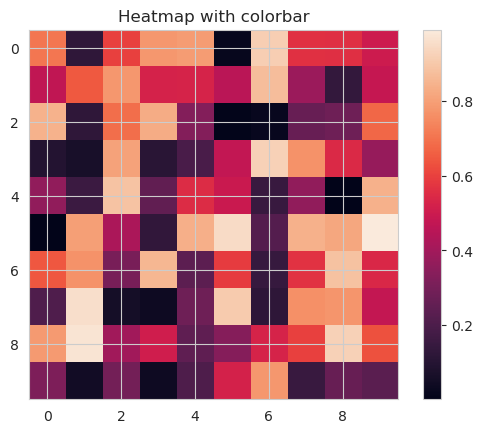

In [5]:
# Getting a hold of the axes object
ax = plt.gca()
# Creating the heatmap
im = plt.imshow(arr1)
# Creating the colorbar
ax.figure.colorbar(im, ax=ax)

plt.title('Heatmap with colorbar')

# Saving the image
utils.save_mpl(2)

plt.show()

### Trying out different cmaps

Find more cmaps in this [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

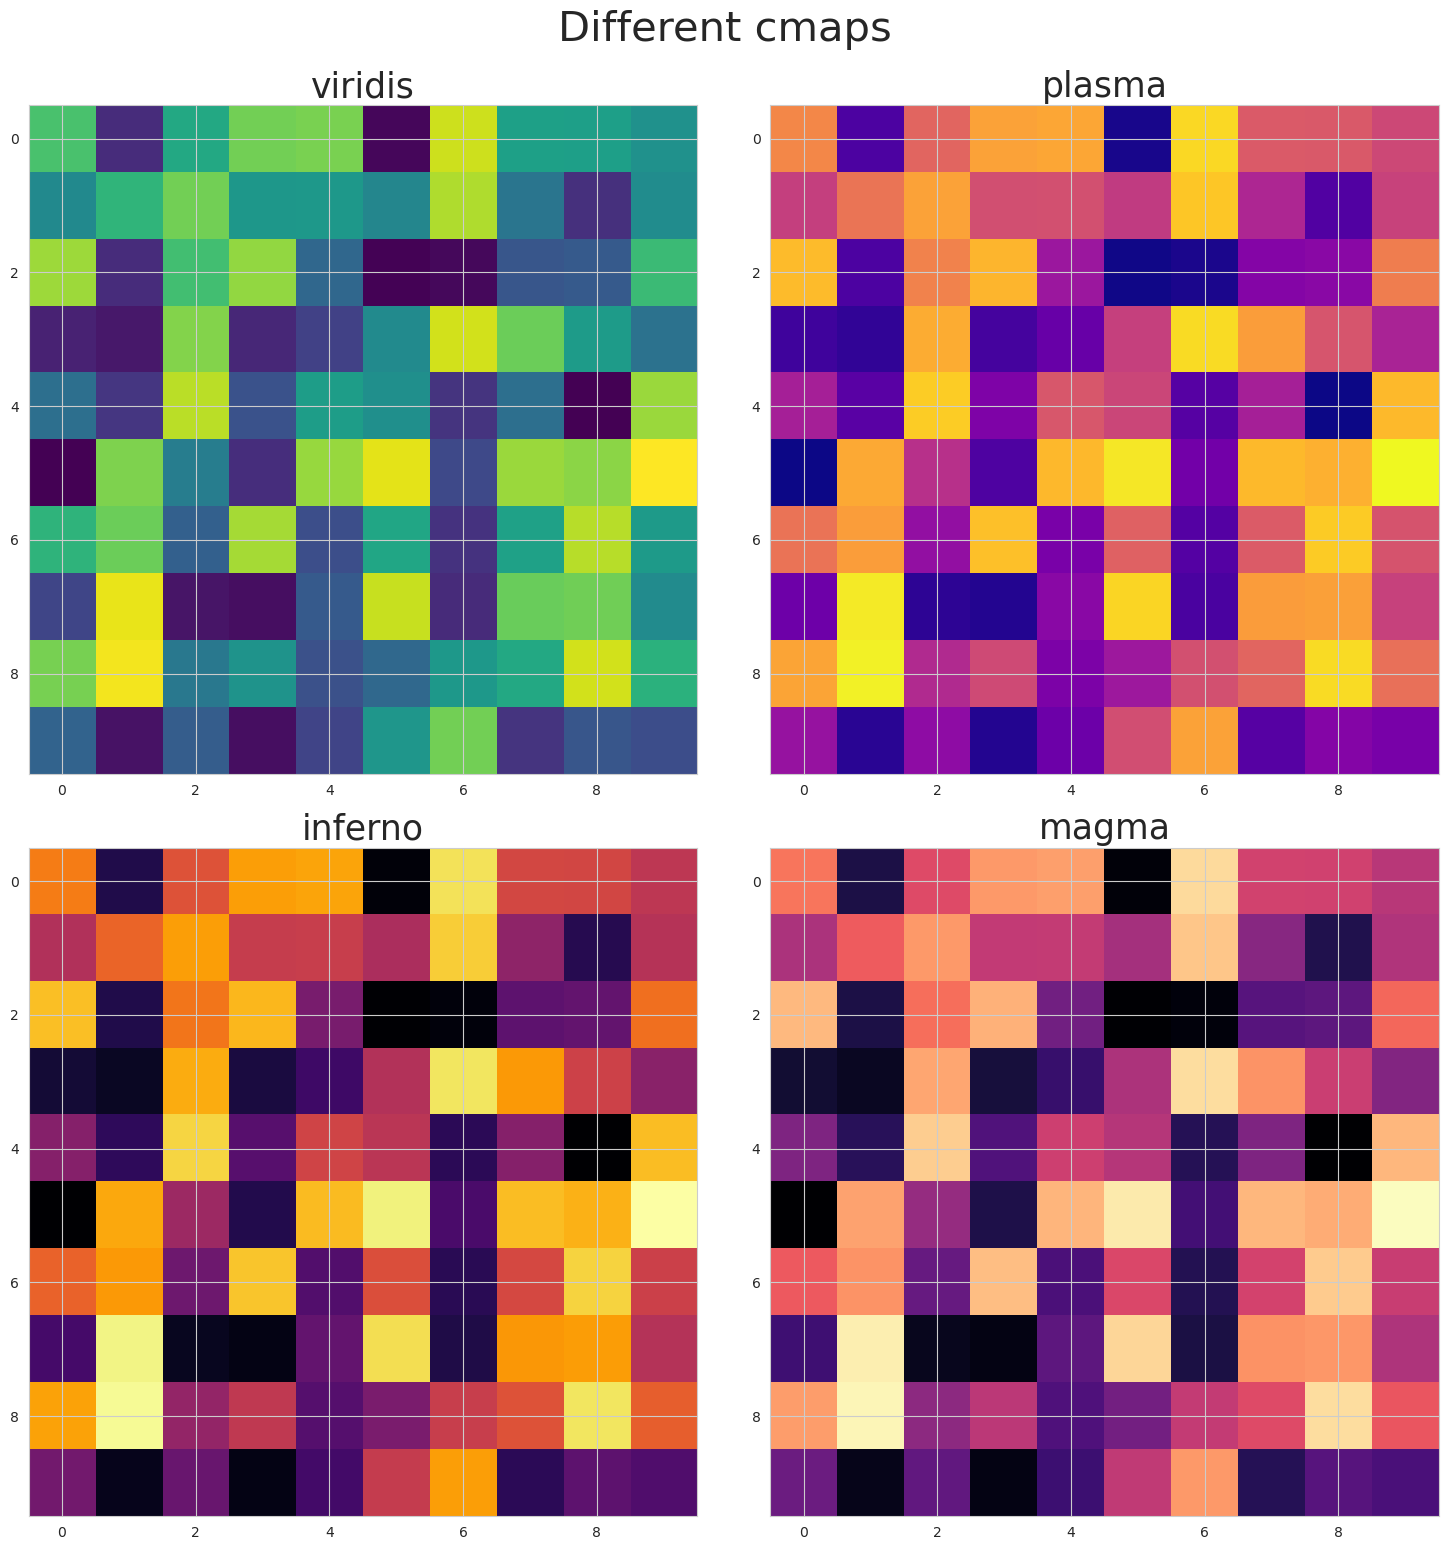

In [6]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma']

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

idx = 0

for i in range(2):
    for j in range(2):
        ax[i][j].imshow(arr1, cmap=cmaps[idx])
        ax[i][j].set_title(cmaps[idx], fontsize=25)
        idx += 1

plt.tight_layout()
plt.suptitle('Different cmaps', fontsize=30, x=.5, y=1.03)

# Saving the image
utils.save_mpl(3)

plt.show()

### Using the interpolation on the heatmap

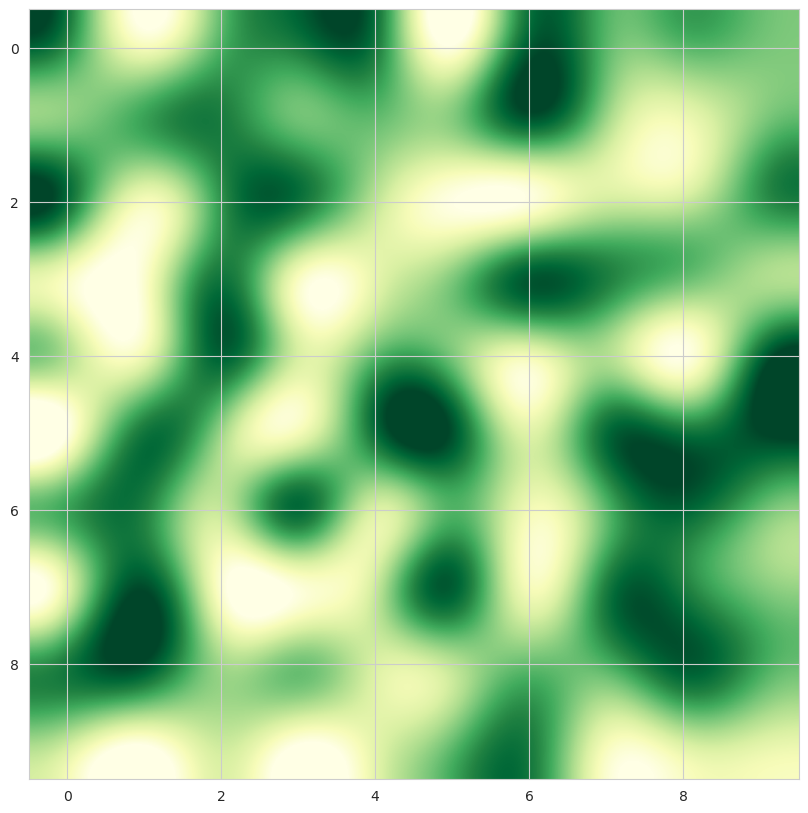

In [7]:
plt.figure(figsize=(10, 10))
ax = plt.gca()

im = ax.imshow(arr1, cmap='YlGn', interpolation='lanczos')

# Saving the image
utils.save_mpl(4)

plt.show()

Showing the rest of the interpolation methods...

In [8]:
interpolations = [
    'bilinear', 'bicubic', 'spline16', 
    'spline36', 'hanning', 'hamming', 
    'hermite', 'kaiser', 'quadric', 
    'catrom', 'gaussian', 'bessel',
    'mitchell', 'sinc', 'lanczos'
]

In [9]:
import matplotlib as mpl

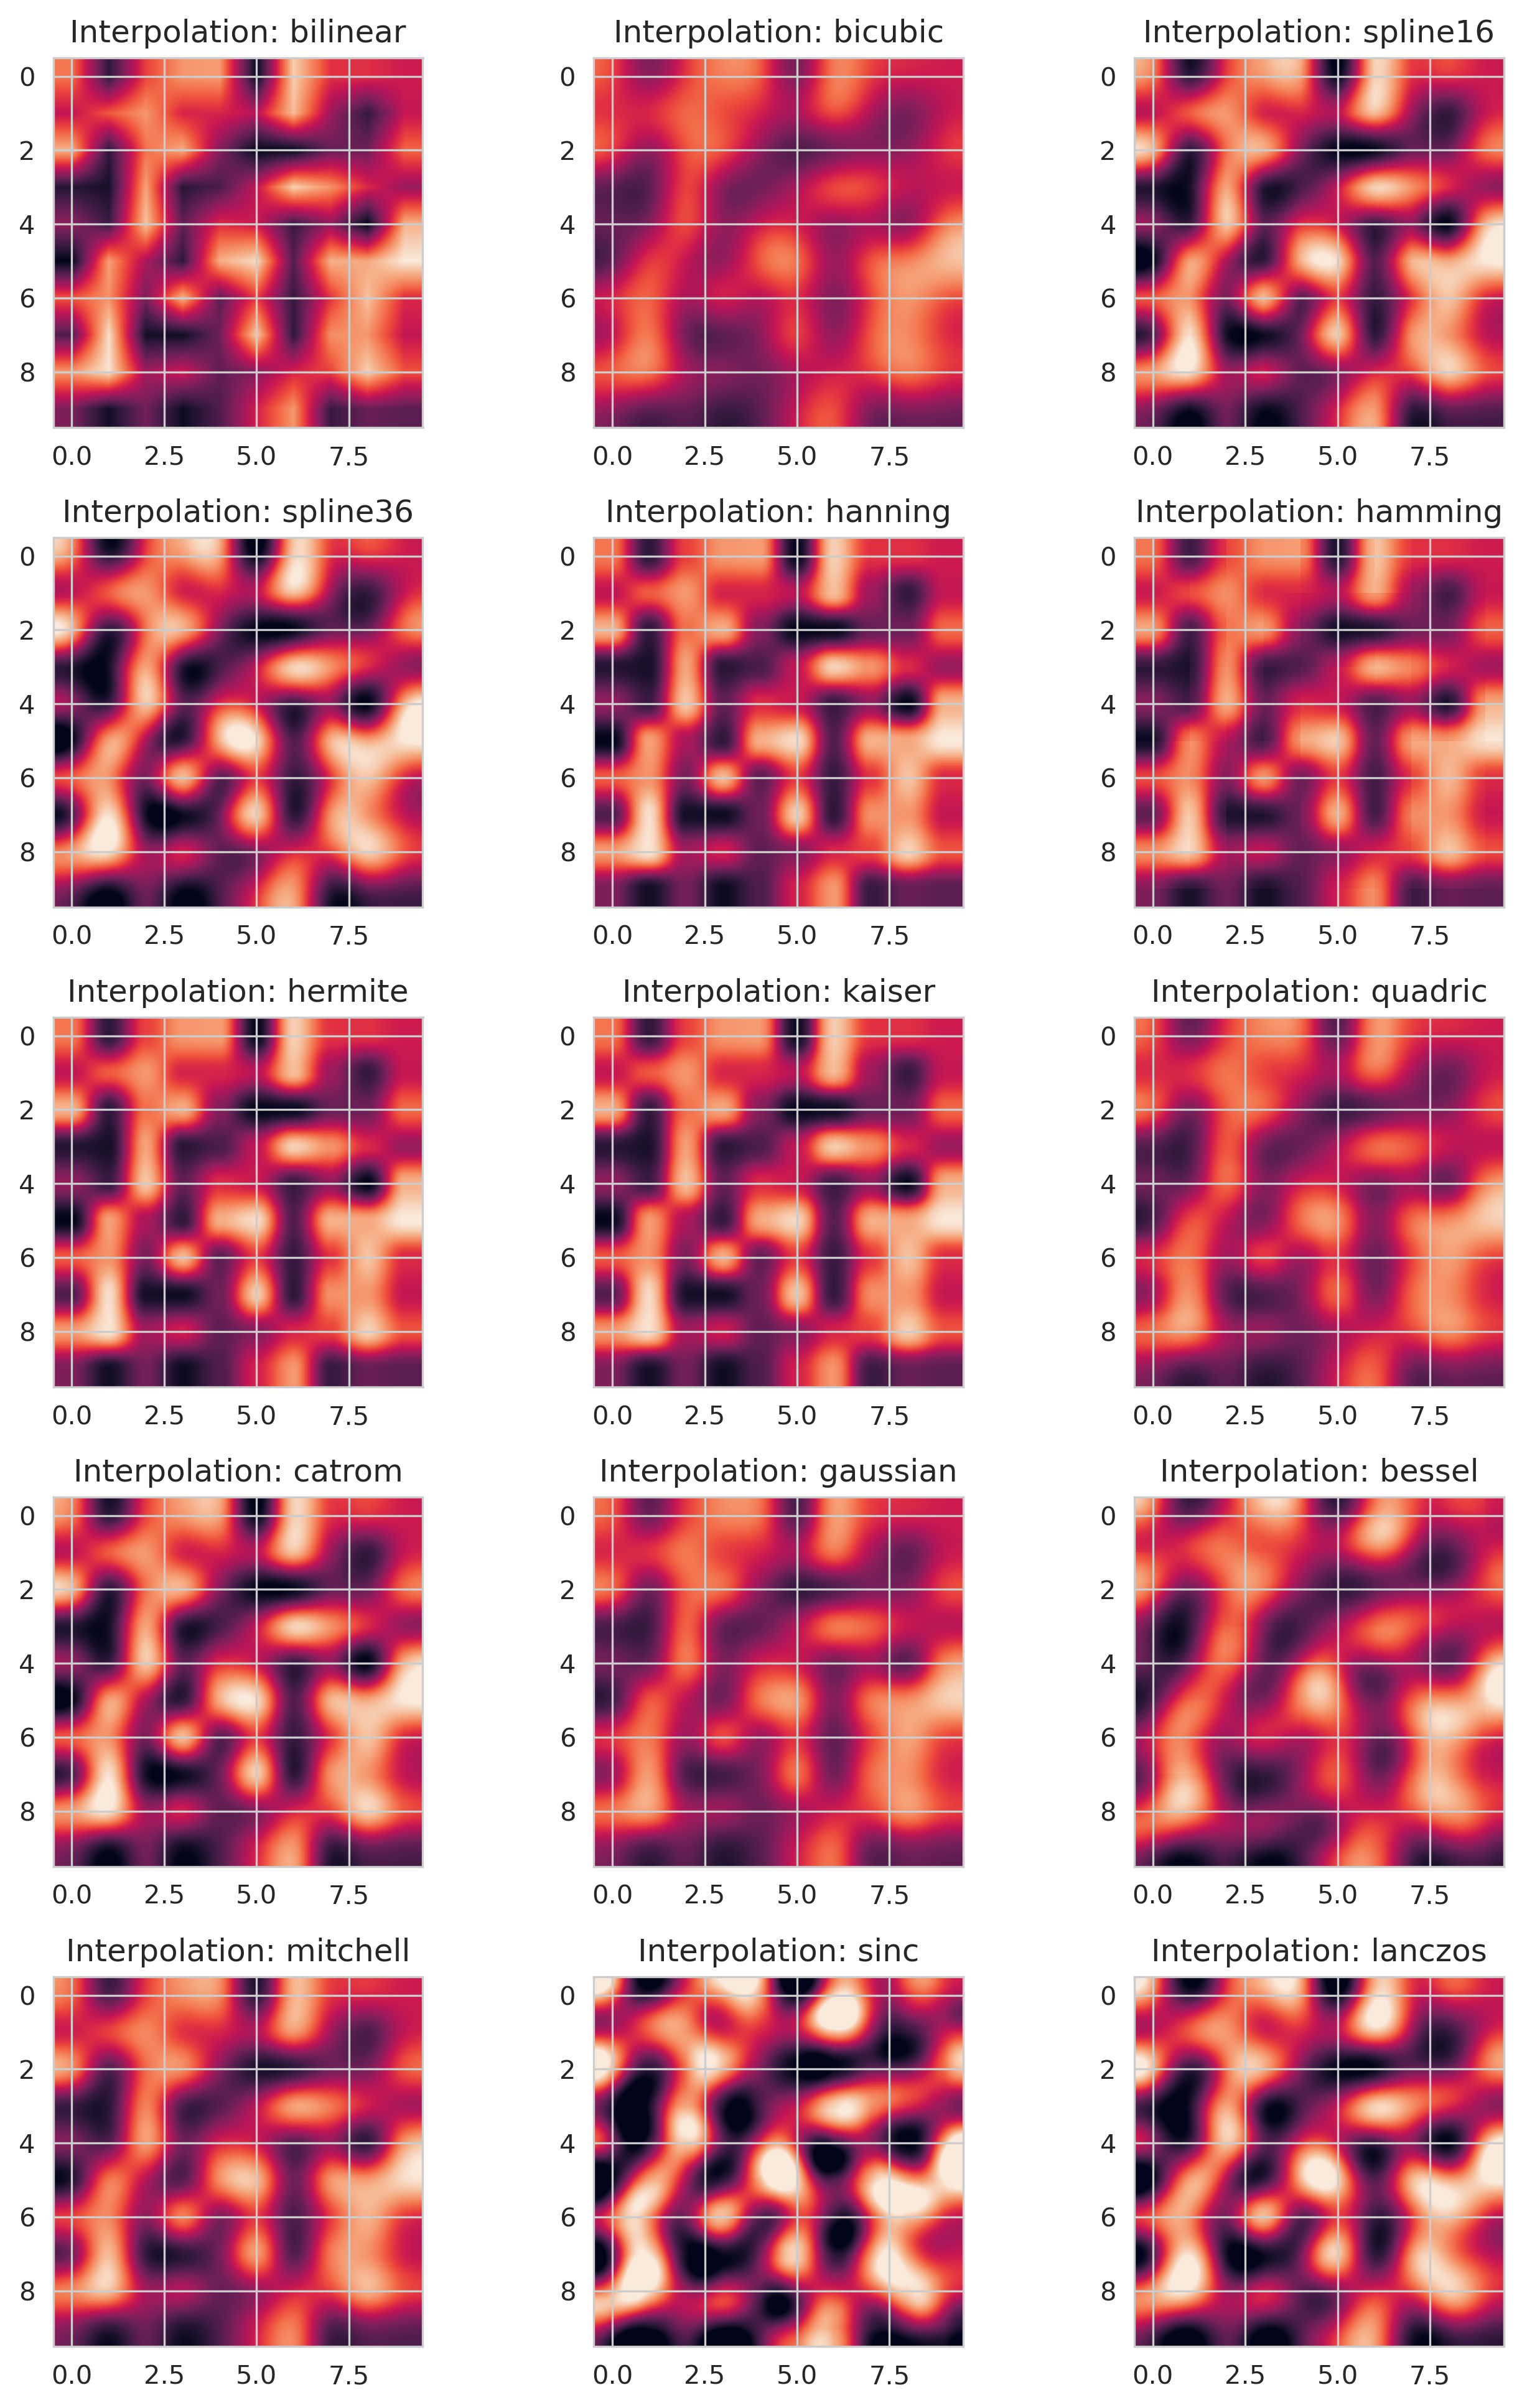

In [11]:
fig = plt.figure(figsize=(9, 13), dpi=300)
axes = []
idx = 1

for i in range(5):
    for j in range(3):
        axes.append(
            fig.add_subplot(5, 3, idx)
        )
        idx += 1

idx = 0
r = fig.canvas.get_renderer()
for a in axes:
    a.imshow(arr1, interpolation=interpolations[idx])
    a.set_title(f'Interpolation: {interpolations[idx]}')

    # Next interpolation
    idx += 1

plt.tight_layout()

idx=0
for a in axes:
    # Saving individual subplots
    extent = a.get_tightbbox(r).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'../../gallery/Heatmap/{interpolations[idx]}.png', bbox_inches=extent)
    idx += 1

plt.show()

### Showing annotations

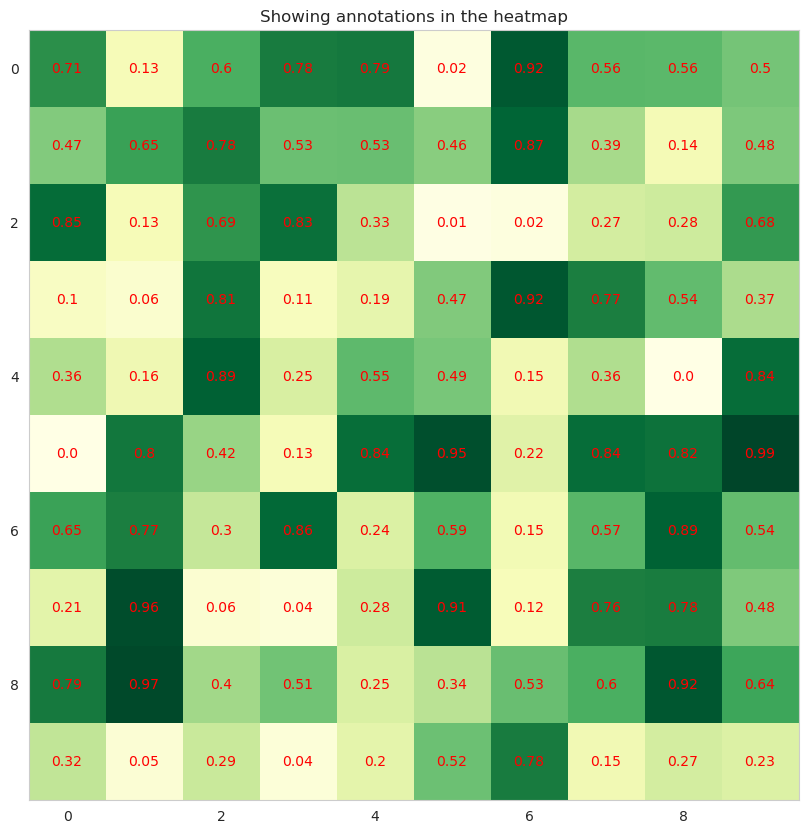

In [12]:
_, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(arr1, cmap='YlGn',)

# Loop over data dimensions and create text annotations
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(arr1[i, j], 2),
                       ha='center', va='center', color='r')

plt.grid(False)
plt.title('Showing annotations in the heatmap')

# Saving the image
utils.save_mpl(5)

plt.show()

### Adding x and y ticks to the heatmap

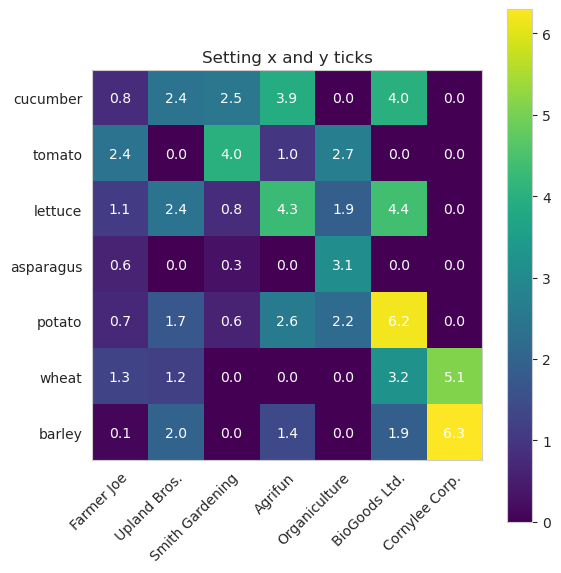

In [13]:
# Data
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

_, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(harvest, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

# Creating the colorbar
ax.figure.colorbar(im, ax=ax)        

plt.title('Setting x and y ticks')
plt.tight_layout()
plt.grid(False)

# Saving the image
utils.save_mpl(6)

plt.show()

## Seaborn

[Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

### Simple seaborn heatmap from numpy array

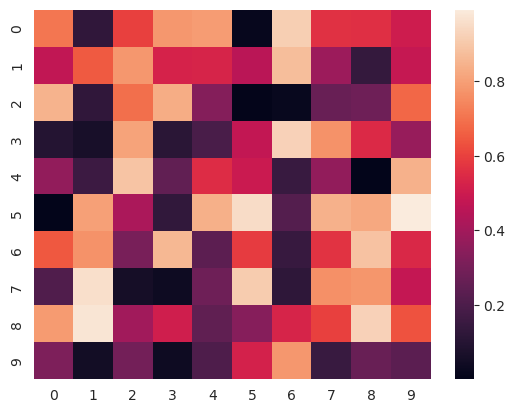

In [14]:
ax = sns.heatmap(arr1)

utils.save_sns(1)

### Changing the limit of the colormap

Using the params `vmin` and `vmax` (floats), Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

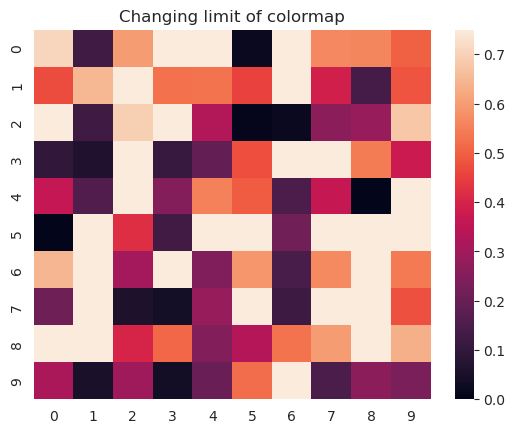

In [15]:
ax = sns.heatmap(arr1, vmin=0, vmax=.75)
ax.set_title('Changing limit of colormap')

utils.save_sns(2)

### Heatmap for data centered on some value.

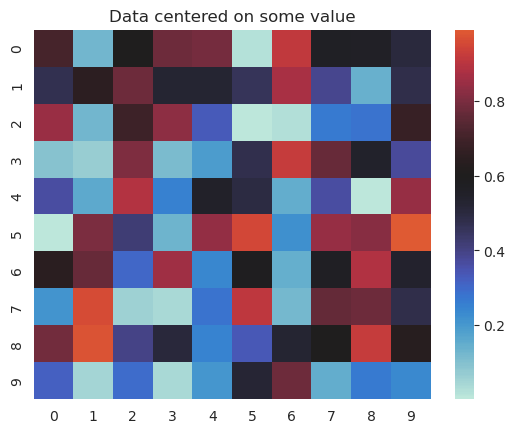

In [16]:
ax = sns.heatmap(arr1, center=.6)
ax.set_title('Data centered on some value')

utils.save_sns(3)

### Plotting from a dataframe

In [17]:
flights = sns.load_dataset('flights')
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

Creating a pivot table

In [18]:
p = flights.pivot(index='month', columns='year', values='passengers')
p

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

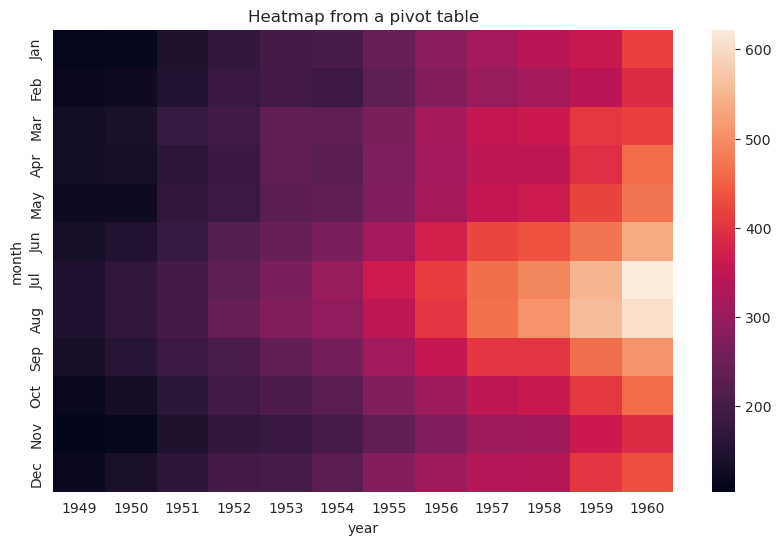

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(p)
ax.set_title('Heatmap from a pivot table')

# Saving the image
utils.save_sns(4)

plt.show()

### Adding annotations to heatmap

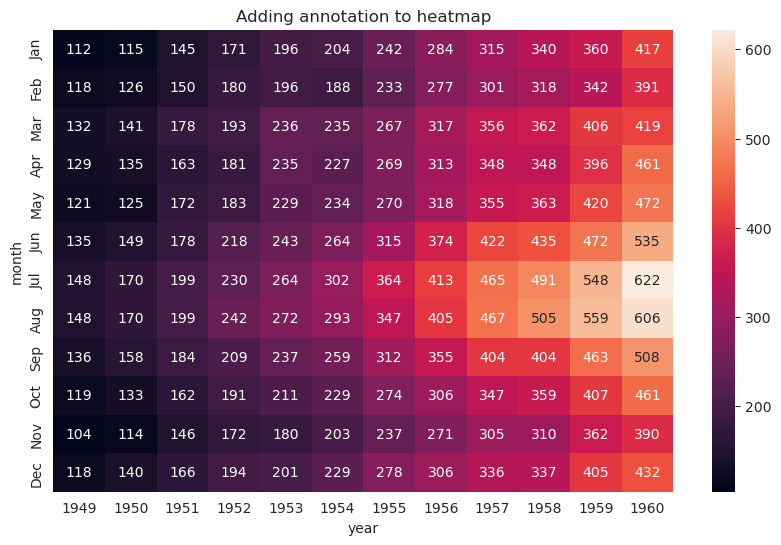

In [20]:
plt.figure(figsize=(10, 6))

# Adding annotation by setting annot = True
ax = sns.heatmap(p, annot=True, fmt='d')

ax.set_title('Adding annotation to heatmap')

# Saving the image
utils.save_sns(5)

plt.show()

### Using different colormaps

In [21]:
cmaps = ['YlGnBu', 'viridis', 'magma_r', 'inferno']

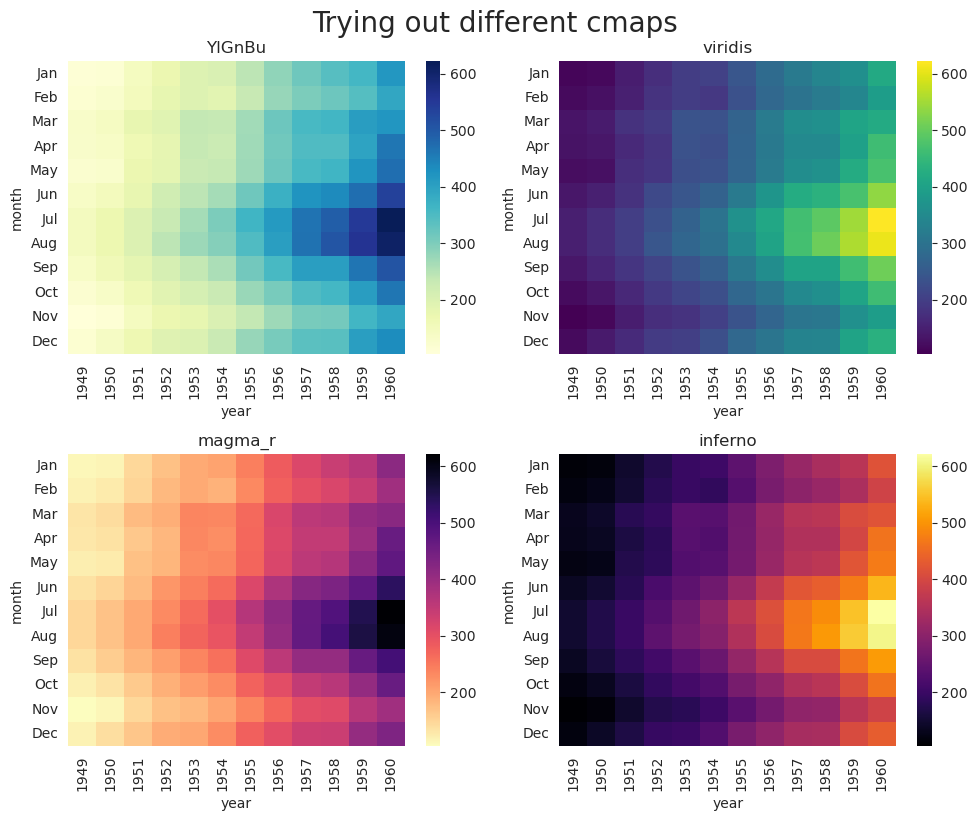

In [22]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

idx = 0

for i in range(2):
    for j in range(2):
        sns.heatmap(p, cmap=cmaps[idx], ax=ax[i][j])
        ax[i][j].set_title(cmaps[idx])
        idx += 1

plt.tight_layout()
plt.suptitle('Trying out different cmaps', fontsize=20, x=.5, y=1.02)

# Saving the image
utils.save_sns(6)

plt.show()

### Centering heatmap at a specific value

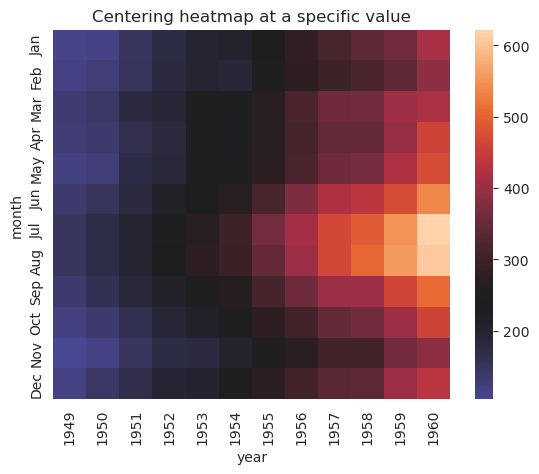

In [23]:
ax = sns.heatmap(p, center=p.loc["Jan", 1955])
plt.title('Centering heatmap at a specific value')

utils.save_sns(7)

### Controlling row and column labels

`xticklabels`, `yticklabels` : 
    "auto", bool, list-like, or int, optional
    If True, plot the column names of the dataframe. If False, don't plot
    the column names. If list-like, plot these alternate labels as the
    xticklabels. If an integer, use the column names but plot only every
    n label. If "auto", try to densely plot non-overlapping labels.

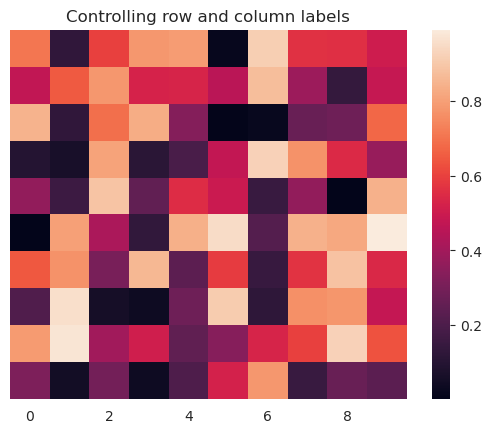

In [24]:
ax = sns.heatmap(arr1, xticklabels=2, yticklabels=False)
plt.title('Controlling row and column labels')


# Saving the image
utils.save_sns(8)

### Disabling colorbar

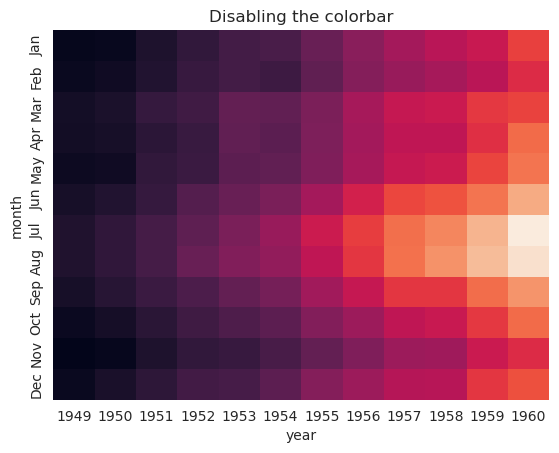

In [25]:
ax = sns.heatmap(p, cbar=False)
plt.title('Disabling the colorbar')

utils.save_sns(9)

### Using different axes for the colorbar

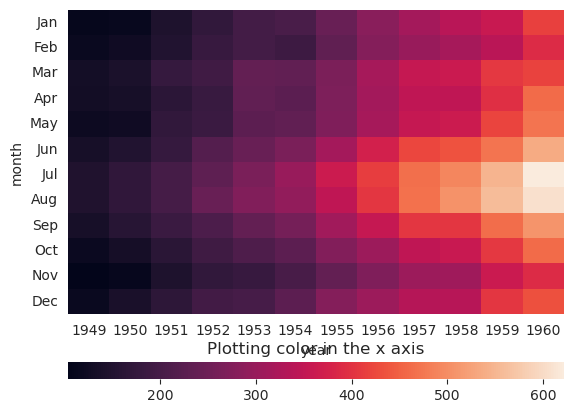

In [26]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(p, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})
plt.title('Plotting color in the x axis')

utils.save_sns(10)

### Masking part of the matrix

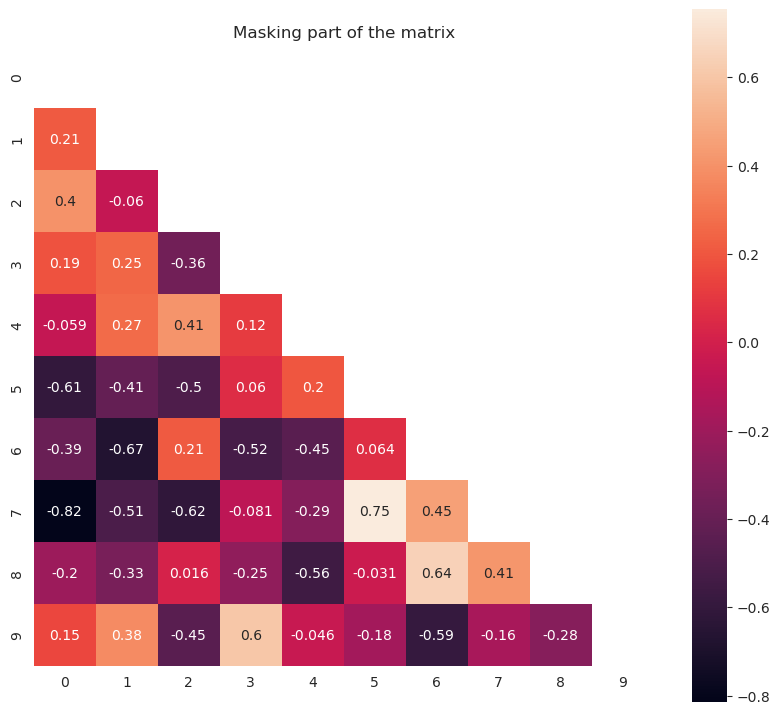

In [27]:
corr = np.corrcoef(arr1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

_, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True)
plt.title('Masking part of the matrix')

utils.save_sns(11)